### Imports

In [21]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
import random
from itertools import chain
def flatten(list_of_lists):
    "Flatten one level of nesting"
    return chain.from_iterable(list_of_lists)

In [23]:
def is_close_enough(pred, ratings):
    """evaluate the accuracy of predictions to within a close-enough range"""
    val = []
    for pair in zip(pred, ratings):
        if pair[1] == 5:
            val.append(pair[1] - 1 <= pair[0])
        else:
            val.append(pair[1] - .5 <= pair[0] <= pair[1] + .5)
        
    return val

### Load data and model

In [24]:
X_train = pd.read_pickle('saved_model/rmse_839/X_train.pkl')
X_test = pd.read_pickle('saved_model/rmse_839/X_test.pkl')
ratings = pd.read_pickle("./Data/final_dataset_pre_split.pkl")

In [7]:
model = keras.models.load_model('saved_model/rmse_839/model.h5')

### Check X_test

In [9]:
X_test.head()

,movie,user,rating_score
14516575,488,20665,4
710117,1561,47335,3
1264453,1776,6414,4
12875819,187,63513,3
3378686,3293,50692,3


In [44]:
X_test.shape

(2656228, 3)

Select 10,000 unique users at random from the X_test set.

In [25]:
random_10000_users = random.choices(X_test.user.unique(), k=10000)

Generate predictions for rated movies in the test set and the accuracy of these predictions.

In [26]:
predictions = []
accuracy = []

for user in random_10000_users:
    movie_array = X_test[X_test.user==user].movie.values.astype(int)
    user_array = np.array([int(user) for n in range(len(movie_array))])
    pred = model.predict([movie_array, user_array])
    val = is_close_enough(np.round(pred.flatten(), 1), X_test[X_test.user==user].rating_score.values)
    
    predictions.append(list(pred.flatten()))
    accuracy.append(sum(val) / len(pred.flatten()))

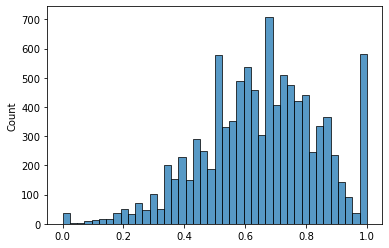

In [27]:
sns.histplot(accuracy)
plt.show()

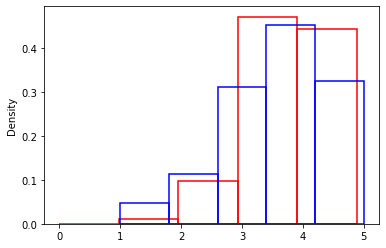

In [28]:
sns.histplot(list(flatten(predictions)), bins=5, color='red', fill=False,
            stat='density', common_norm=False)


sns.histplot(X_test[X_test.user.isin(random_10000_users)].rating_score.values, bins=5, color='blue', fill=False,
            stat='density', common_norm=False)

plt.show()

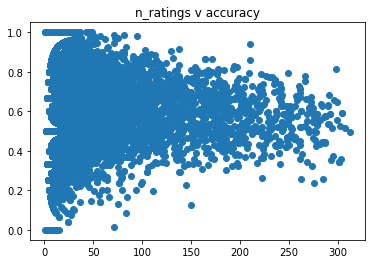

In [37]:
plt.scatter(x=X_test.groupby('user').count()['movie'].loc[random_10000_users].values,
           y=accuracy)

plt.title('n_ratings v accuracy')
plt.show()

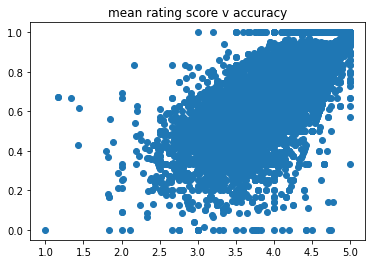

In [38]:
plt.scatter(x=X_test.groupby('user').mean()['rating_score'].loc[random_10000_users].values,
           y=accuracy)

plt.title('mean rating score v accuracy')
plt.show()

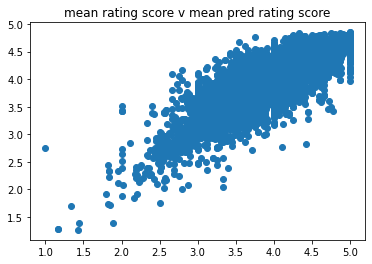

In [42]:
plt.scatter(x=X_test.groupby('user').mean()['rating_score'].loc[random_10000_users].values,
           y=[np.mean(pred) for pred in predictions])

plt.title('mean rating score v mean pred rating score')
plt.show()